<a href="https://colab.research.google.com/github/ziatdinovmax/FerroSim/blob/master/Examples/FerroSim_GP_v2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian process-based optimization of material for optimal response

April 24, 2020


- FerroSIM package by *Rama K. Vasudevan*
- GPim package by *Maxim Ziatdinov*
- Workflow by *Sergei V. Kalinin*

In [0]:
#@title Installations
!pip install git+https://github.com/ramav87/FerroSim.git
!pip install gpim

Imports:

In [0]:
from ferrosim import Ferro2DSim
import gpim
import numpy as np
import matplotlib.pyplot as plt

We start by plotting loops as a function of parameters and vizualize the depolarization factor effects.

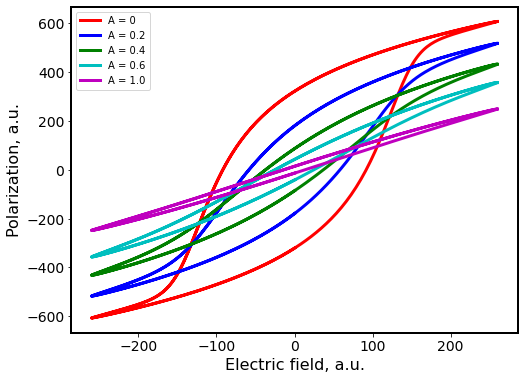

In [3]:
# Depolarization factor effects
loop_t_arr = np.zeros((874))
for tt in range (0,100,10):
    sim = Ferro2DSim(
        n=10, defect_number=0, rfield_strength=0,
        rTip=3, t_max=1, E_frac=300)
    sim.dep_alpha = 0.02*tt
    results = sim.runSim()
    loop_t_arr = np.vstack((loop_t_arr, sim.results['Polarization'][126:]))

# Plot results
plt.figure(figsize=(8,6))
plt.plot(sim.appliedE[125:], loop_t_arr[1,:], 'r-', lw=3, label='A = 0')
plt.plot(sim.appliedE[125:], loop_t_arr[2,:], 'b-', lw=3, label='A = 0.2')
plt.plot(sim.appliedE[125:], loop_t_arr[3,:], 'g-', lw=3, label='A = 0.4')
plt.plot(sim.appliedE[125:], loop_t_arr[4,:], 'c-', lw=3, label='A = 0.6')
plt.plot(sim.appliedE[125:], loop_t_arr[6,:], 'm-', lw=3, label='A = 1.0')
plt.tick_params(labelsize = 14)
plt.legend()

ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.xlabel('Electric field, a.u.', fontsize=16)
plt.ylabel('Polarization, a.u.', fontsize=16)

plt.show()

Now plot evolution of the loops as a function of the defect concentration:

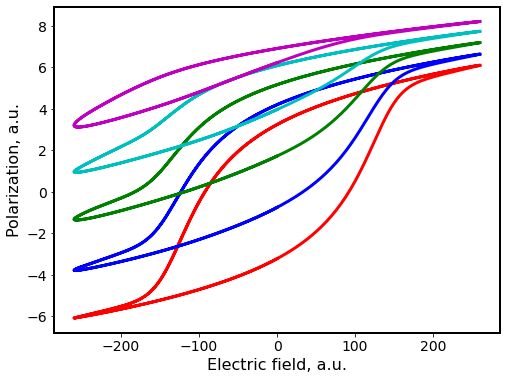

In [4]:
loop_t_arr = np.zeros((874))
for tt in range (0,100,20):
    #k1 = 0.2*tt
    k1 = 1
    defect_number = 5*tt
    sim = Ferro2DSim(
        n=20, k=k1, defect_number=defect_number,
        rfield_strength=1000, rTip=3, t_max=1, E_frac=300)
    sim.dep_alpha = 0.0
    results = sim.runSim()
    loop_t_arr = np.vstack((loop_t_arr, sim.results['Polarization'][126:]/(20**2)))

# plot results
plt.figure(figsize = (8,6))
plt.plot(sim.appliedE[125:],loop_t_arr[1,:], 'r-', lw = 3)
plt.plot(sim.appliedE[125:],loop_t_arr[2,:], 'b-', lw = 3)
plt.plot(sim.appliedE[125:],loop_t_arr[3,:], 'g-', lw = 3)
plt.plot(sim.appliedE[125:],loop_t_arr[4,:], 'c-', lw = 3)
plt.plot(sim.appliedE[125:],loop_t_arr[5,:], 'm-', lw = 3)
plt.tick_params(labelsize = 14)

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel('Electric field, a.u.', fontsize=16)
plt.ylabel('Polarization, a.u.', fontsize=16)

plt.show()

Now we will explore responses as a function of model parameters.

In [0]:
def quality_func(def_num, random_field):
  sim = Ferro2DSim(n = 10, defect_number = def_num, rfield_strength=random_field, rTip = 3)
  results = sim.runSim()
  st_1 = sim.results['Polarization'][125:625].sum()
  st_2 = (sim.results['Polarization'][375:625]-sim.results['Polarization'][125:375]).sum()
  st_3 = sim.results['Polarization'][500]
  st_4 = sim.results['Polarization'][500] - sim.results['Polarization'][250]
  return st_1, st_2, st_3, st_4

def quality_func_1(def_num, random_field):
  sim = Ferro2DSim(n = 10, defect_number = def_num, rfield_strength = 20.0*random_field, rTip = 3)
  results = sim.runSim()
  st = sim.results['Polarization'][750]
  return st  

In [6]:
results_arr = np.zeros((20,20,4))
param_arr = np.zeros((20,20,2))

for i in range(20):
  for j in range(20):
    print('Iteration', 20*i + j+1, 'of 400')
    def_num = 5*j
    random_field = 5*i
    param_arr[i,j,0] = random_field
    param_arr[i,j,1] = def_num
    st_1, st_2, st_3, st_4 = quality_func(def_num, random_field)
    results_arr[i,j,0] = st_1/(100*250)
    results_arr[i,j,1] = st_2/(100*250)
    results_arr[i,j,2] = st_3/100
    results_arr[i,j,3] = st_4/100

Iteration 1 of 400
Iteration 2 of 400
Iteration 3 of 400
Iteration 4 of 400
Iteration 5 of 400
Iteration 6 of 400
Iteration 7 of 400
Iteration 8 of 400
Iteration 9 of 400
Iteration 10 of 400
Iteration 11 of 400
Iteration 12 of 400
Iteration 13 of 400
Iteration 14 of 400
Iteration 15 of 400
Iteration 16 of 400
Iteration 17 of 400
Iteration 18 of 400
Iteration 19 of 400
Iteration 20 of 400
Iteration 21 of 400
Iteration 22 of 400
Iteration 23 of 400
Iteration 24 of 400
Iteration 25 of 400
Iteration 26 of 400
Iteration 27 of 400
Iteration 28 of 400
Iteration 29 of 400
Iteration 30 of 400
Iteration 31 of 400
Iteration 32 of 400
Iteration 33 of 400
Iteration 34 of 400
Iteration 35 of 400
Iteration 36 of 400
Iteration 37 of 400
Iteration 38 of 400
Iteration 39 of 400
Iteration 40 of 400
Iteration 41 of 400
Iteration 42 of 400
Iteration 43 of 400
Iteration 44 of 400
Iteration 45 of 400
Iteration 46 of 400
Iteration 47 of 400
Iteration 48 of 400
Iteration 49 of 400
Iteration 50 of 400
Iteration

Plot results for integral,  remanent and switchable polarization, and for the loop area:

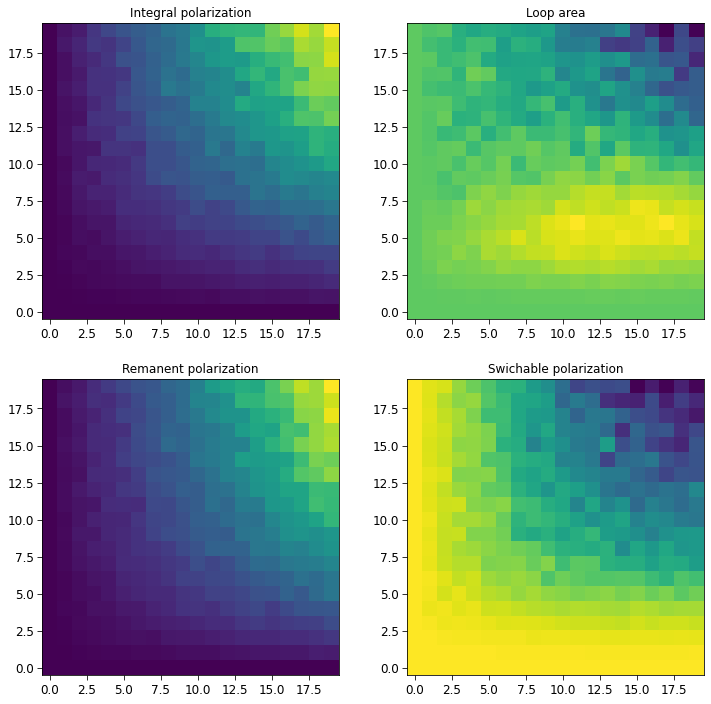

In [7]:
_, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0,0].imshow(results_arr[:,:,0],cmap='viridis', origin='lower')
ax[0,0].tick_params(labelsize=12, length=5)
ax[0,0].set_title('Integral polarization') 
ax[0,1].imshow(results_arr[:,:,1], cmap='viridis', origin='lower')
ax[0,1].tick_params(labelsize=12, length=5)
ax[0,1].set_title('Loop area')
ax[1,0].imshow(results_arr[:,:,2],cmap='viridis', origin='lower')
ax[1,0].tick_params(labelsize=12, length=5)
ax[1,0].set_title('Remanent polarization') 
ax[1,1].imshow(results_arr[:,:,3], cmap='viridis', origin='lower')
ax[1,1].tick_params(labelsize=12, length=5)
ax[1,1].set_title('Swichable polarization')
plt.show()

Let's now explore this response field using GP-based exploration-exploitation. First we define new objective functions that compute loop asymmetry and loop area.

In [0]:
def quality_func_2(input_arr):
    def_num, random_field = input_arr[0], input_arr[1]
    sim = Ferro2DSim(n=10, defect_number=def_num, rfield_strength=random_field, rTip=3)
    results = sim.runSim()
    st = (sim.results['Polarization'][500]+sim.results['Polarization'][250])/(sim.results['Polarization'][500]-sim.results['Polarization'][250])
    return st  

def quality_func_3(input_arr):
    def_num, random_field = input_arr[1], input_arr[0]
    sim = Ferro2DSim(n=10, defect_number=def_num, rfield_strength=random_field, rTip=3)
    results = sim.runSim()
    st = ((sim.results['Polarization'][375:625]-sim.results['Polarization'][125:375]).sum())/(100*250)
    return st  

Define custom acquisition functions for GP-based Bayesian optimization:

In [0]:
import random

def acq(gpmodel, X_full, X_sparse):  # leave it as is
    mean, sd = gpmodel.predict(X_full, verbose=0) # leave it as is
    acq = np.exp(-(mean-0.7)**2)
    return acq, (mean, sd)  # leave it as is


def acq2(gpmodel, X_full, X_sparse):  # leave it as is
    mean, sd = gpmodel.predict(X_full, verbose=0) # leave it as is
    random_bit = random.getrandbits(1)
    random_boolean = bool(random_bit)
    if random_boolean:
      acq = np.exp(-(mean-0.9)**2)
    else:
      acq = sd
    return acq, (mean, sd)  # leave it as is    

Create an empty grid and seed it with a few random observations:

In [0]:
size_def, size_field = 100, 100
Z_sparse = np.ones((size_def, size_field))*np.nan
idx = np.random.randint(0, Z_sparse.shape[0], size=(5, 2))
for i in idx:
    Z_sparse[i[0], i[1]] = quality_func_3([i[0], i[1]])

Run optimization:

In [11]:
# Get full and sparse grids
X_full = gpim.utils.get_full_grid(Z_sparse)
X_sparse= gpim.utils.get_sparse_grid(Z_sparse)
# Initialize Bayesian optimizer with a custom acquisition function
boptim = gpim.boptimizer(
    X_sparse, Z_sparse, X_full, 
    quality_func_3, acquisition_function=acq2,  # added custom acquisition function
    exploration_steps=100, dscale=4, batch_size=5000, exit_strategy=1,
    use_gpu=False, verbose=1)
# Run Bayesian optimization
boptim.run()

Streaming output truncated to the last 5000 lines.
Finding the next max point...
Acquisition function max value 0.9997786180698179 at [21, 72]
Finding the next max point...
Acquisition function max value 0.9997781477143189 at [25, 82]
Finding the next max point...
Acquisition function max value 0.9997781233659186 at [24, 81]
Finding the next max point...
Acquisition function max value 0.9997779684064264 at [22, 59]
Finding the next max point...
Acquisition function max value 0.9997777735218377 at [25, 56]
Finding the next max point...
Acquisition function max value 0.9997774771522527 at [29, 82]
Finding the next max point...
Acquisition function max value 0.9997768993331102 at [22, 77]
Finding the next max point...
Acquisition function max value 0.9997766837482419 at [27, 56]
Finding the next max point...
Acquisition function max value 0.9997766829006235 at [31, 80]
Finding the next max point...
Acquisition function max value 0.9997766213821597 at [21, 62]
Finding the next max point...

Plot results at different steps of the optimization:

Step 1


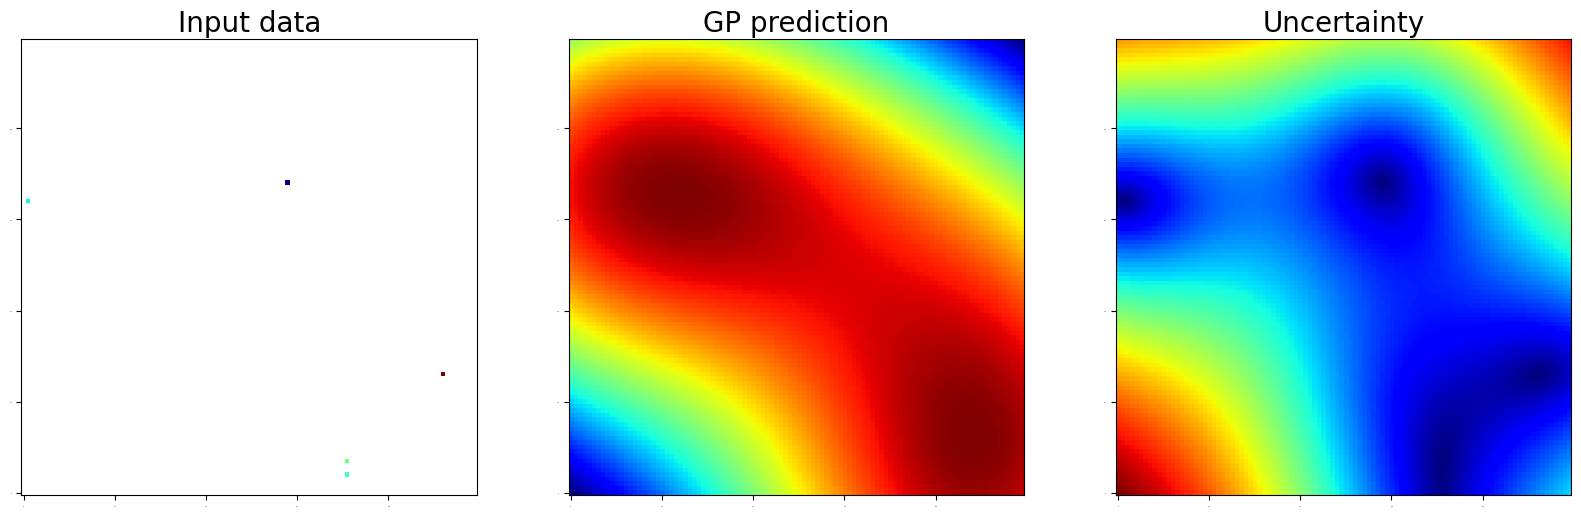

Step 6


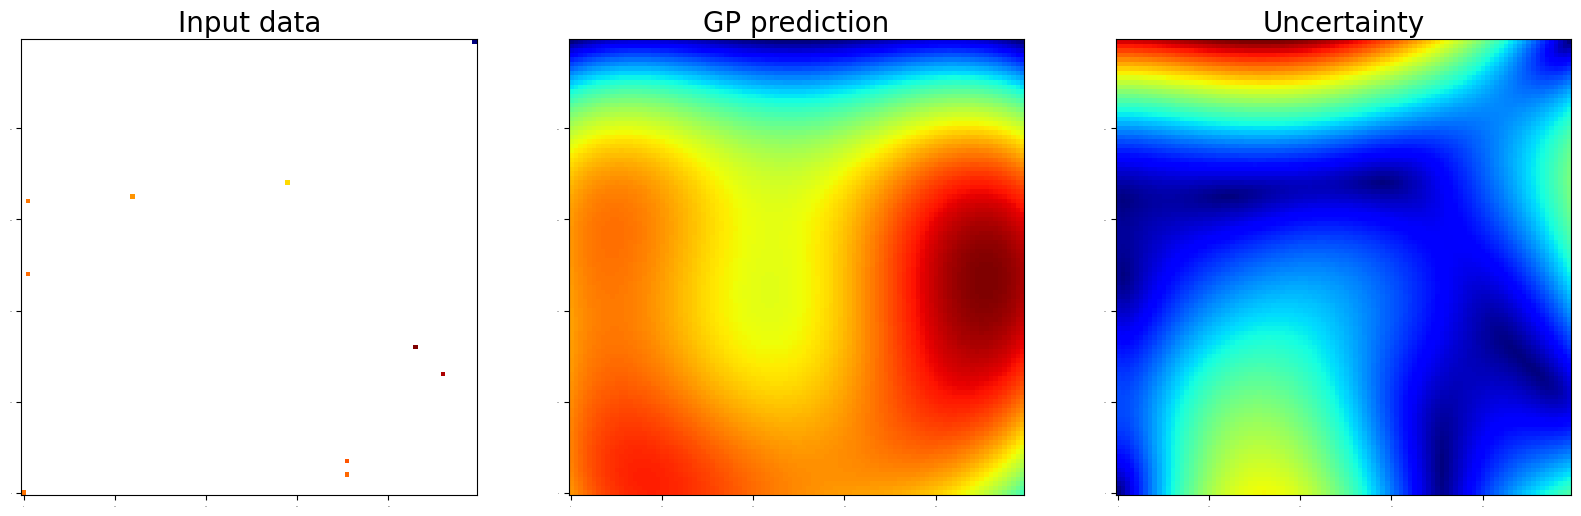

Step 11


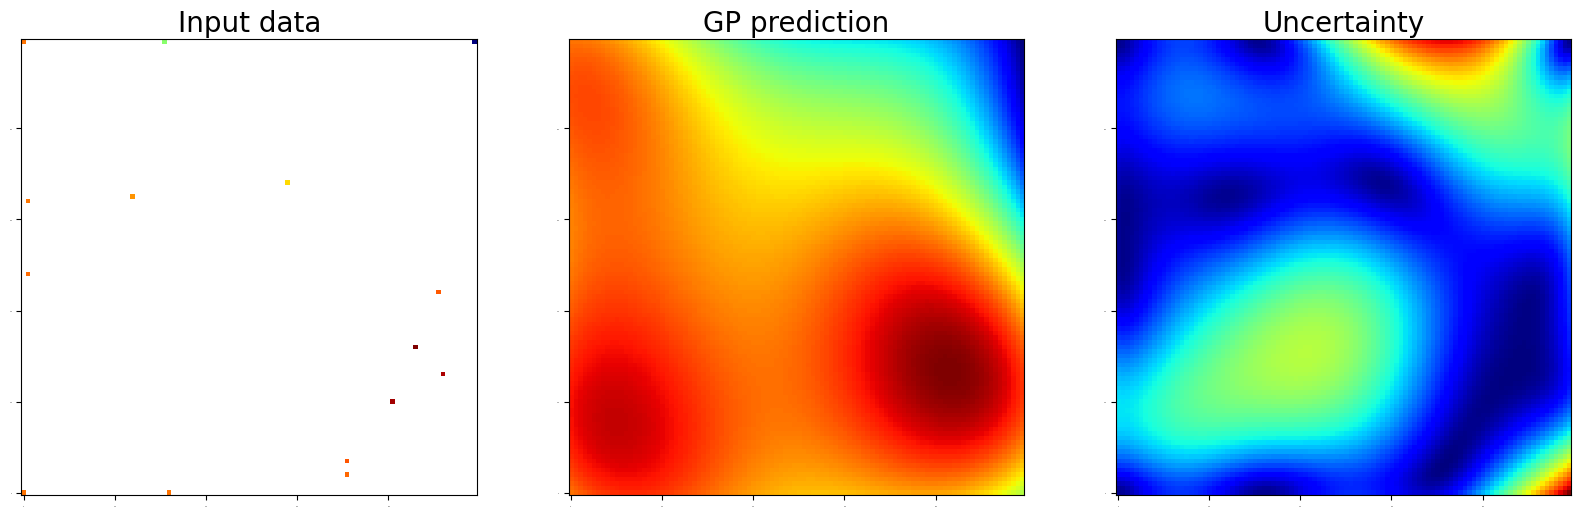

Step 16


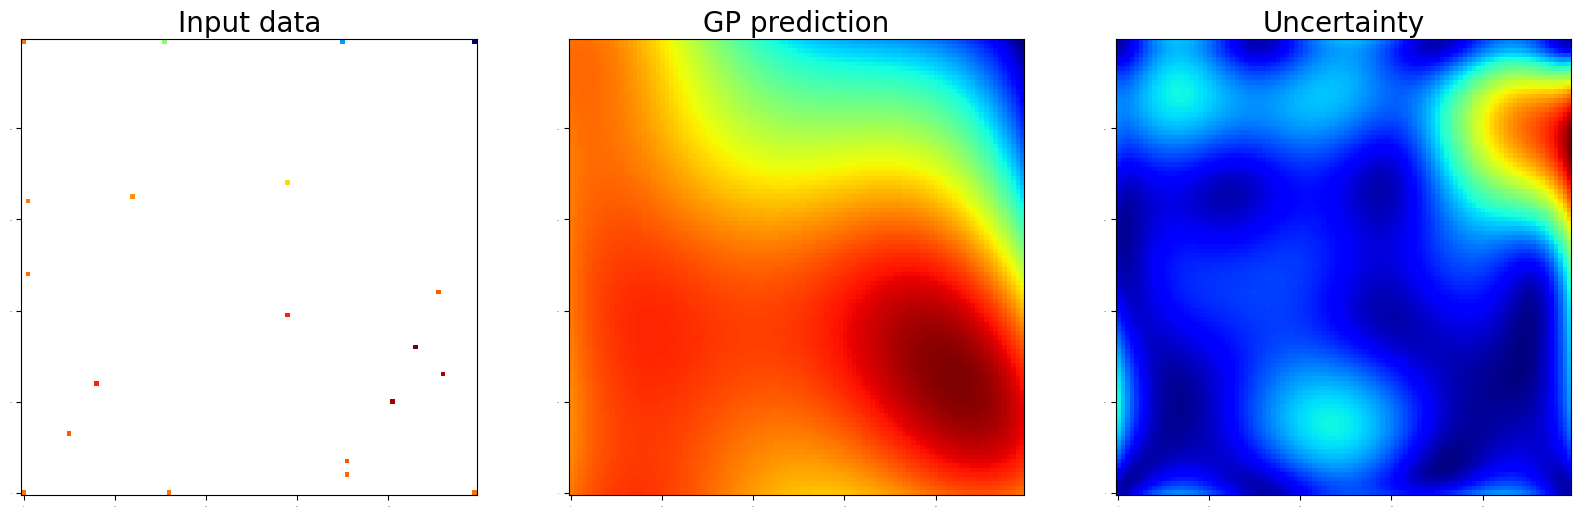

Step 21


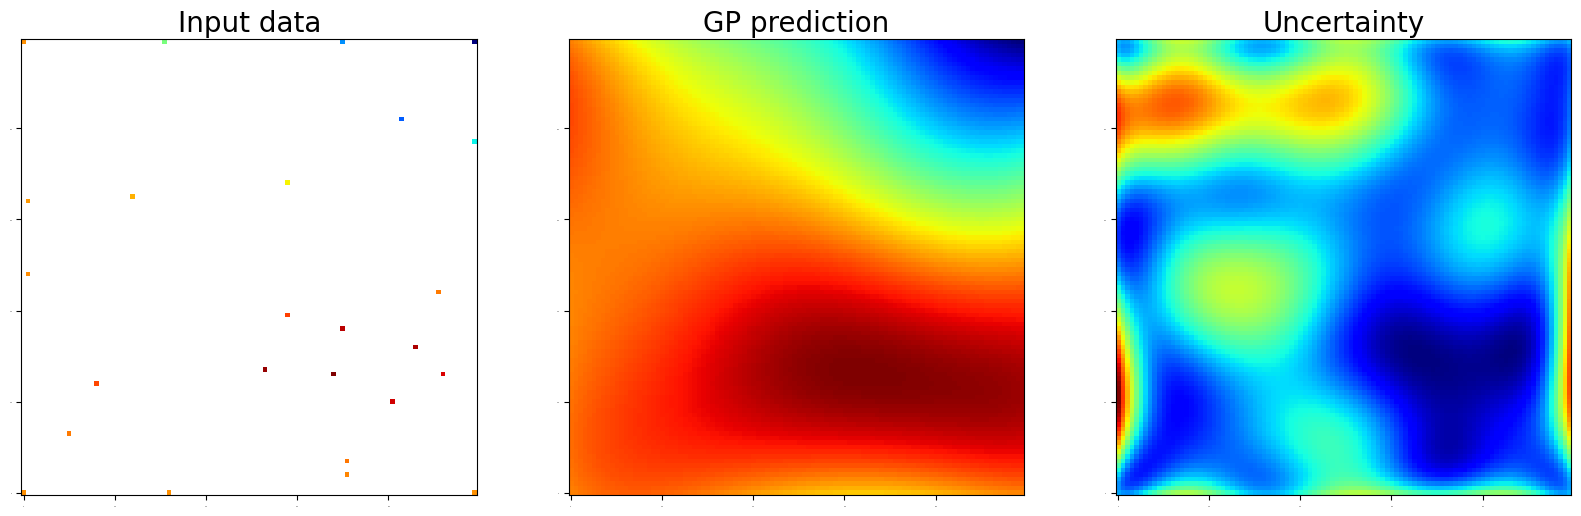

Step 26


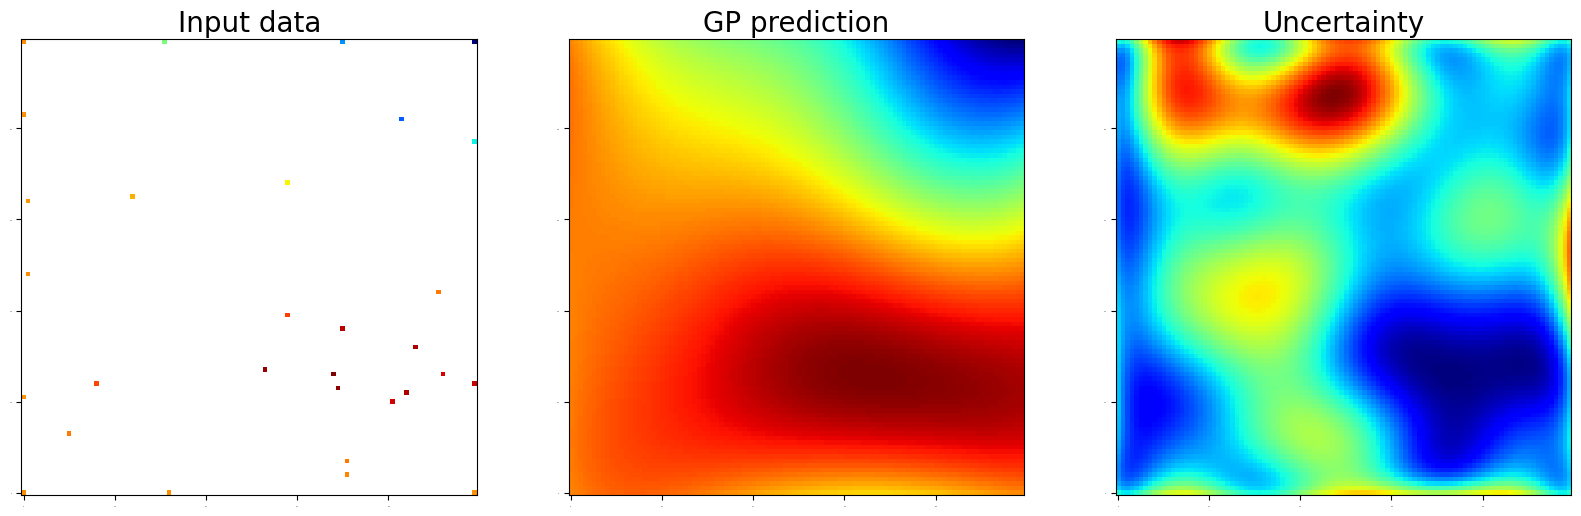

Step 31


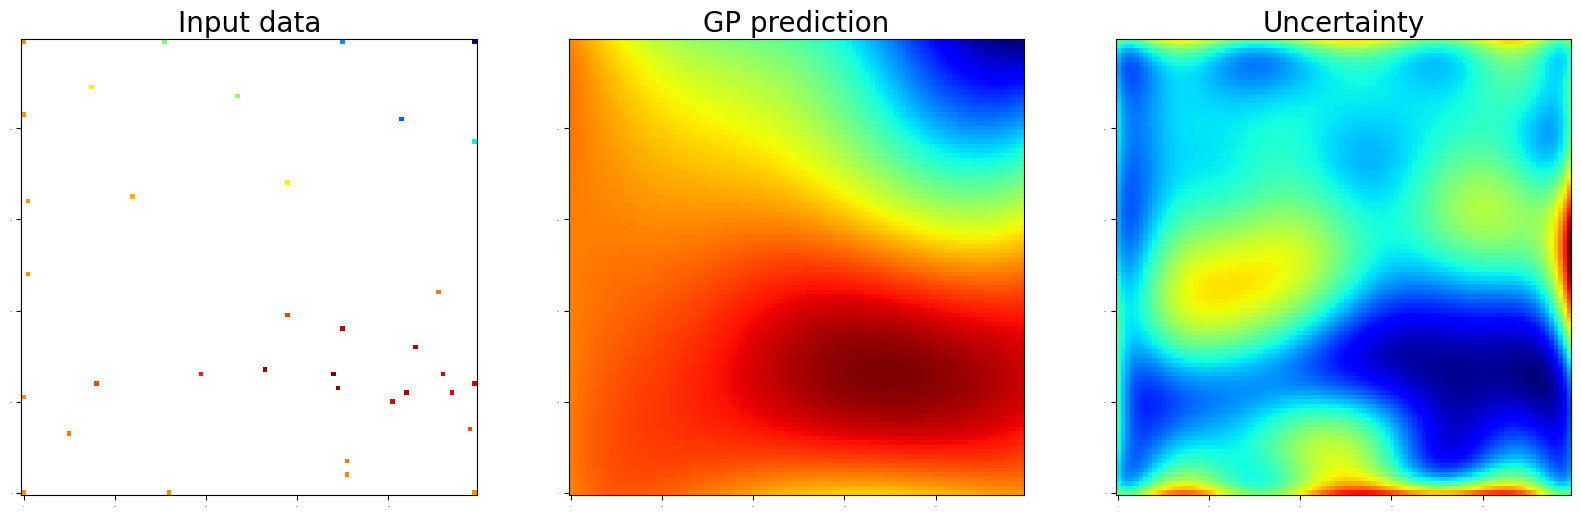

Step 36


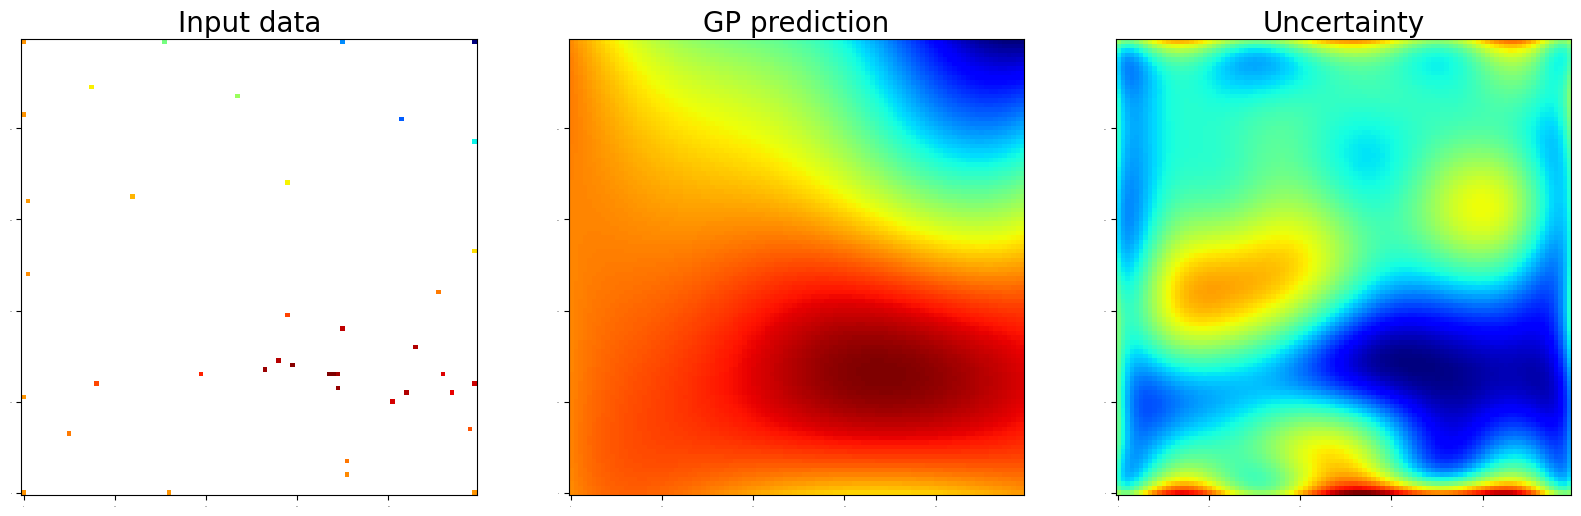

Step 41


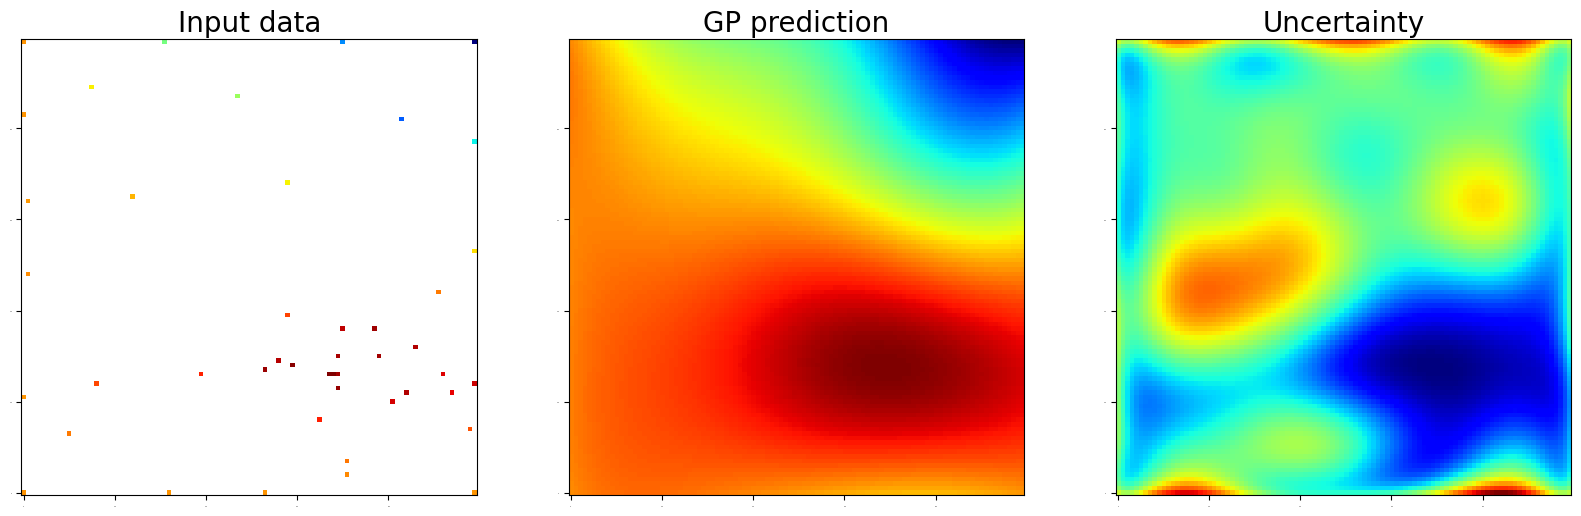

Step 46


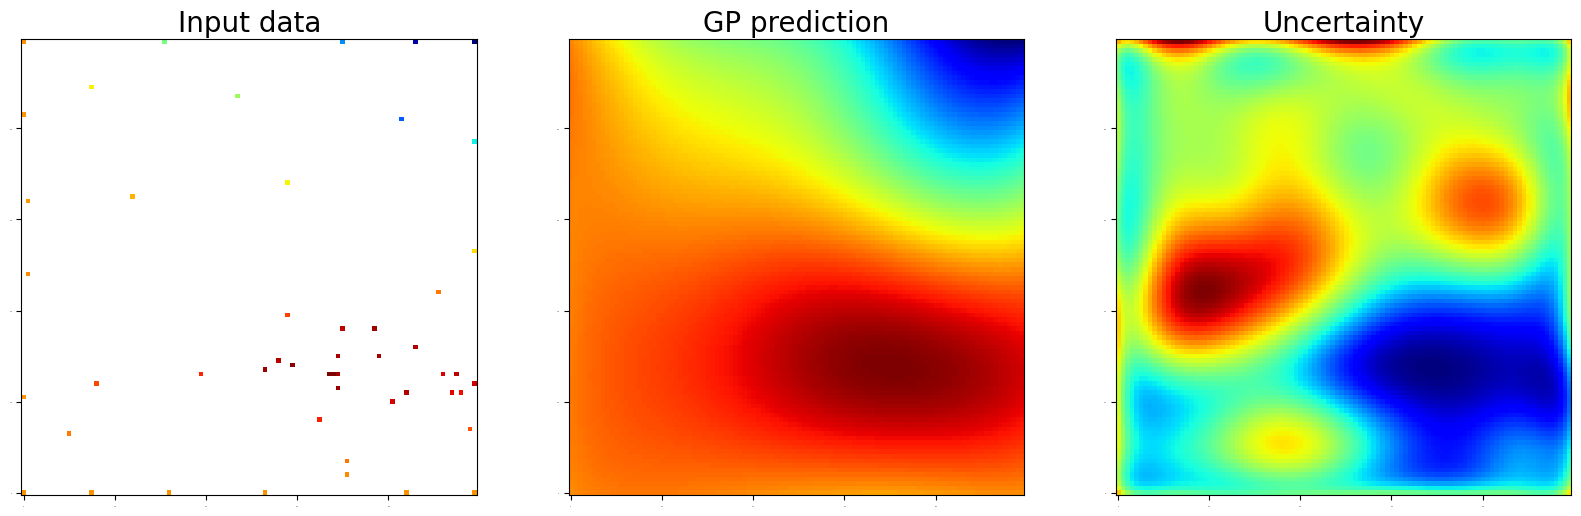

Step 51


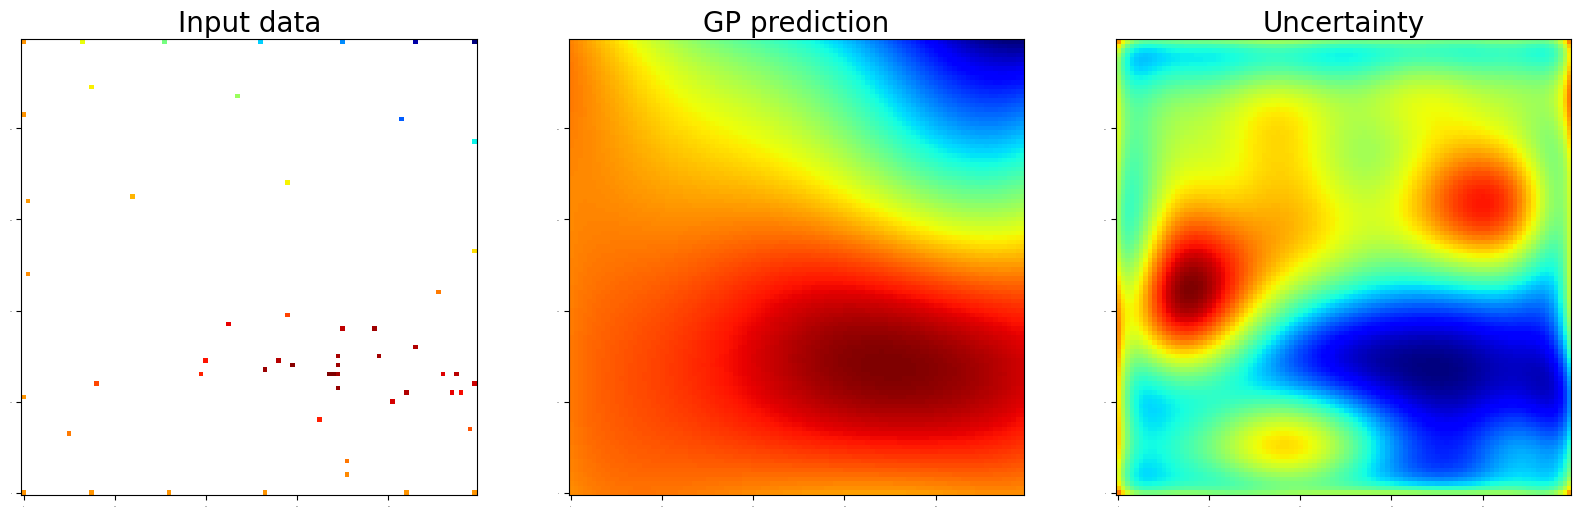

Step 56


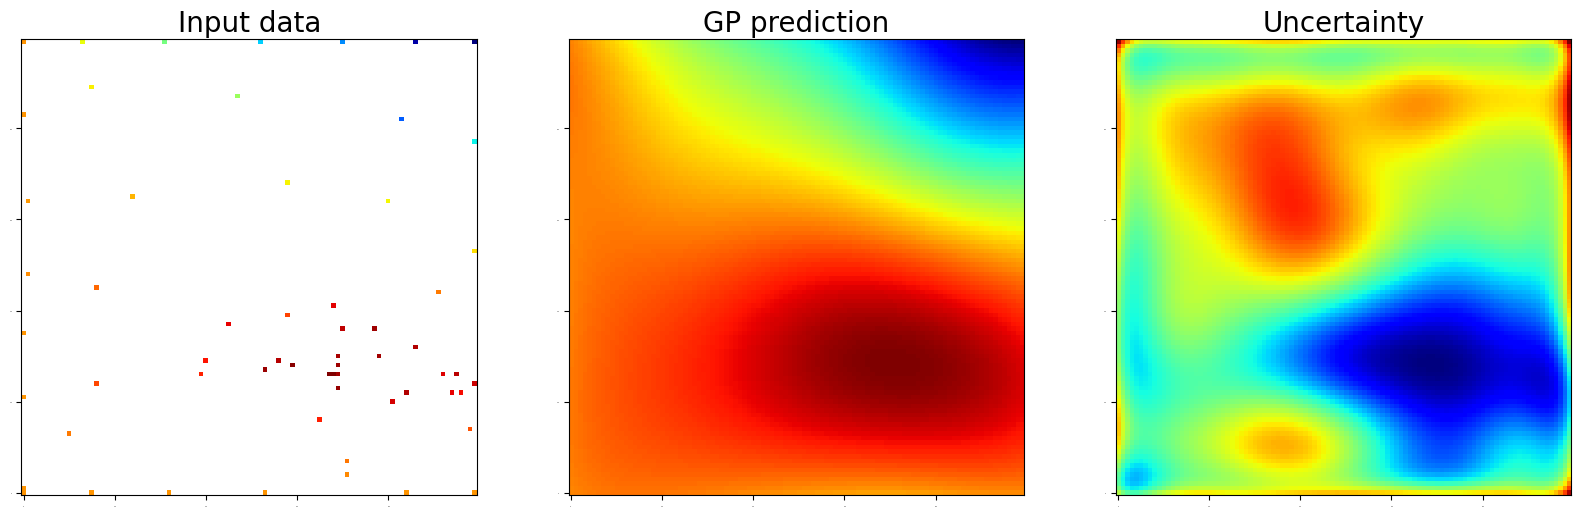

Step 61


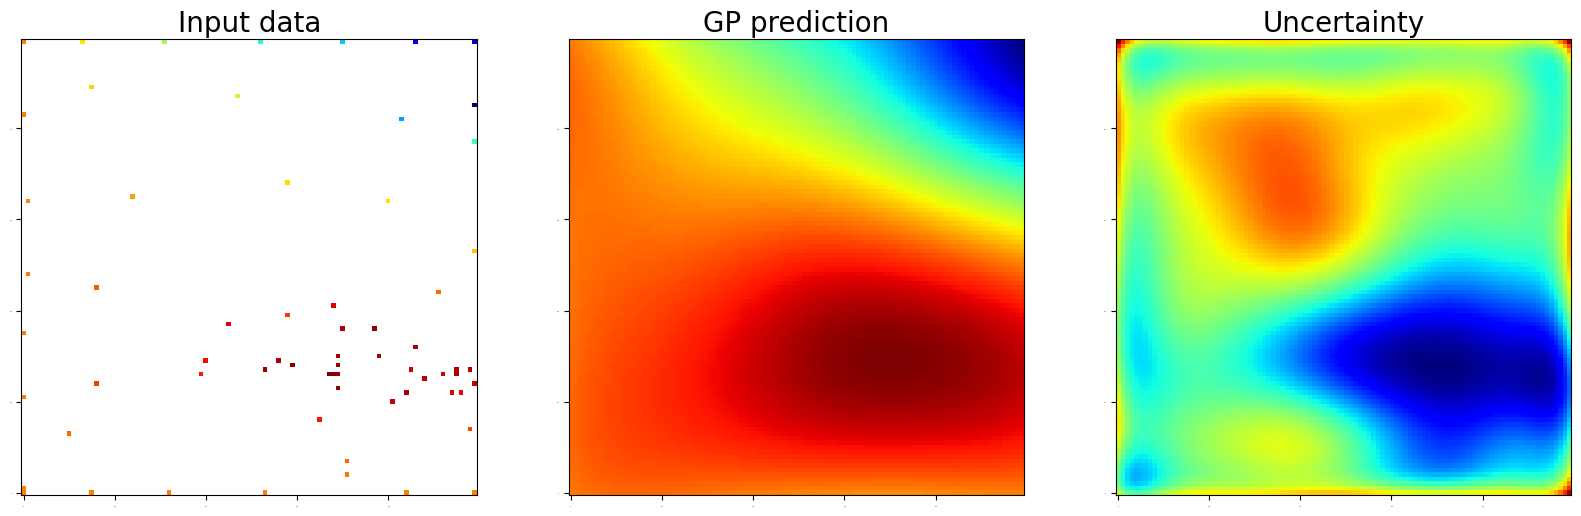

Step 66


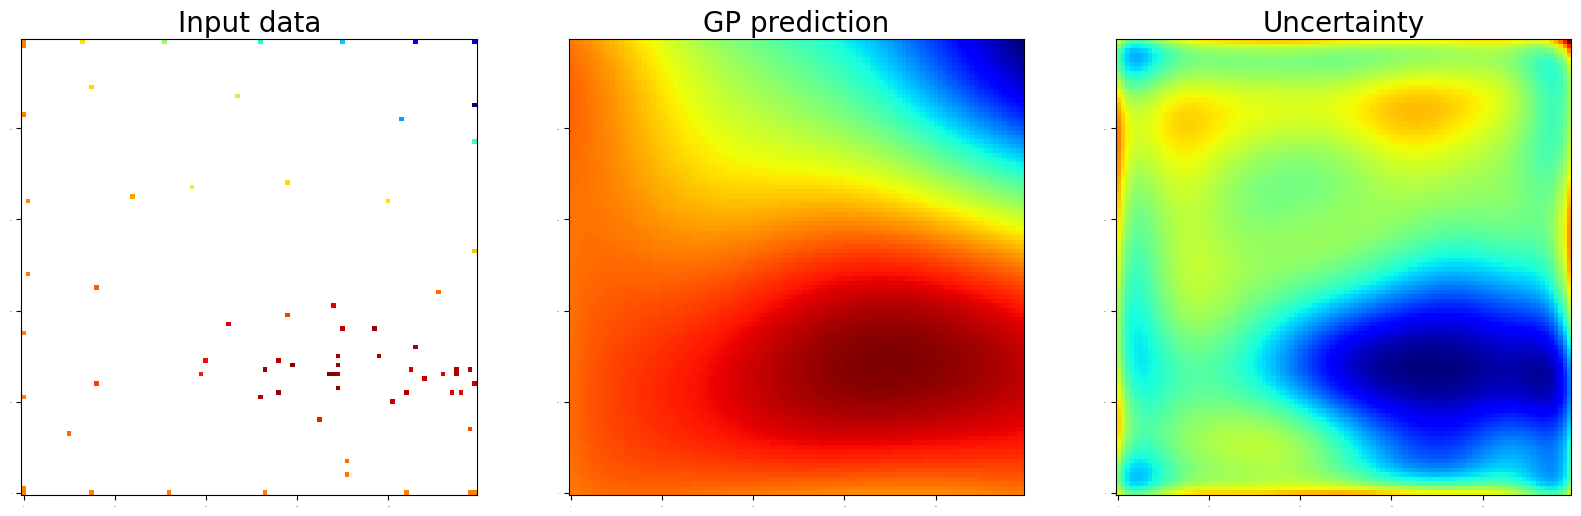

Step 71


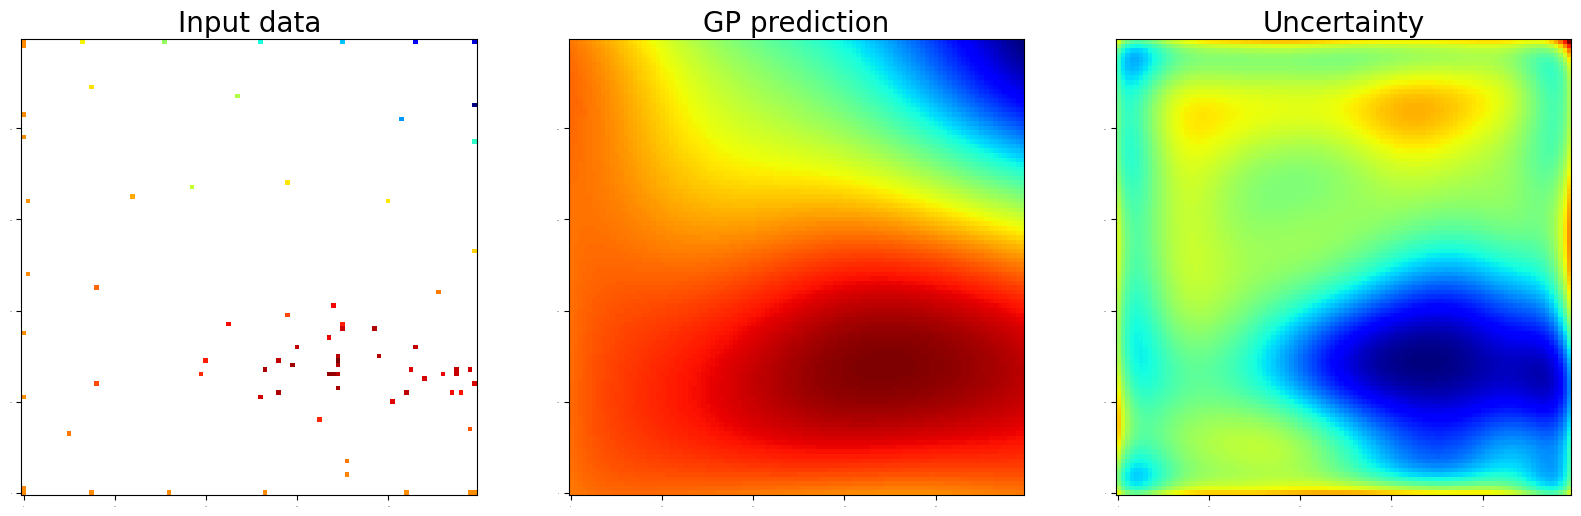

Step 76


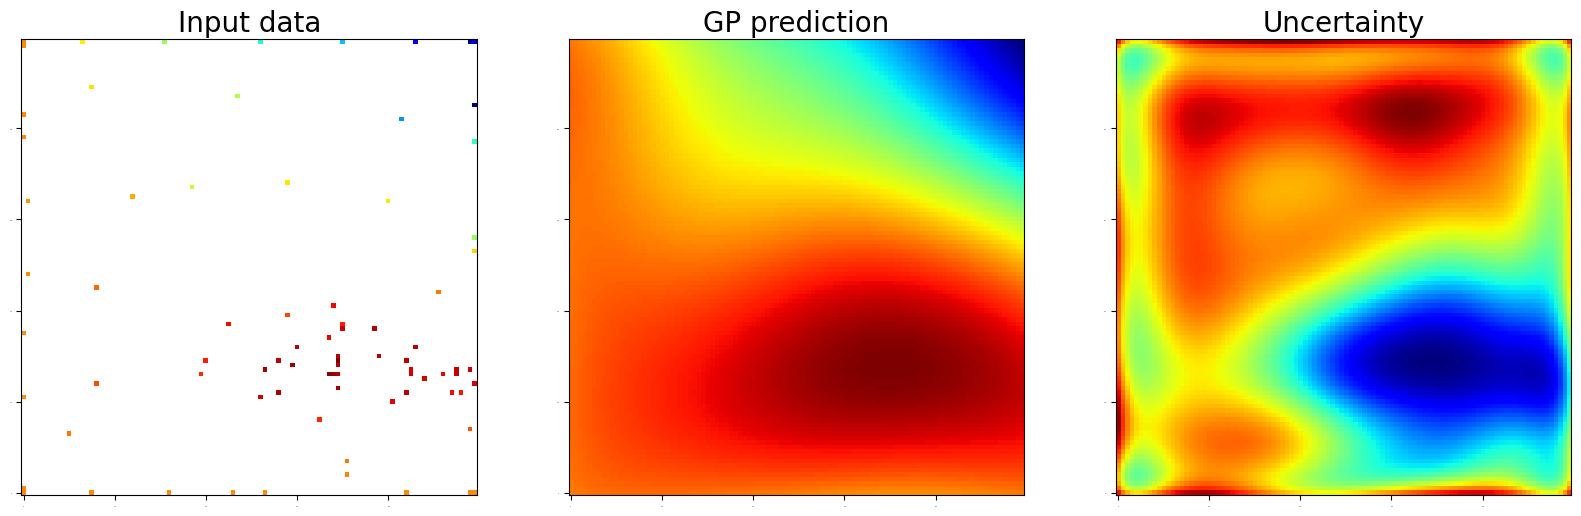

Step 81


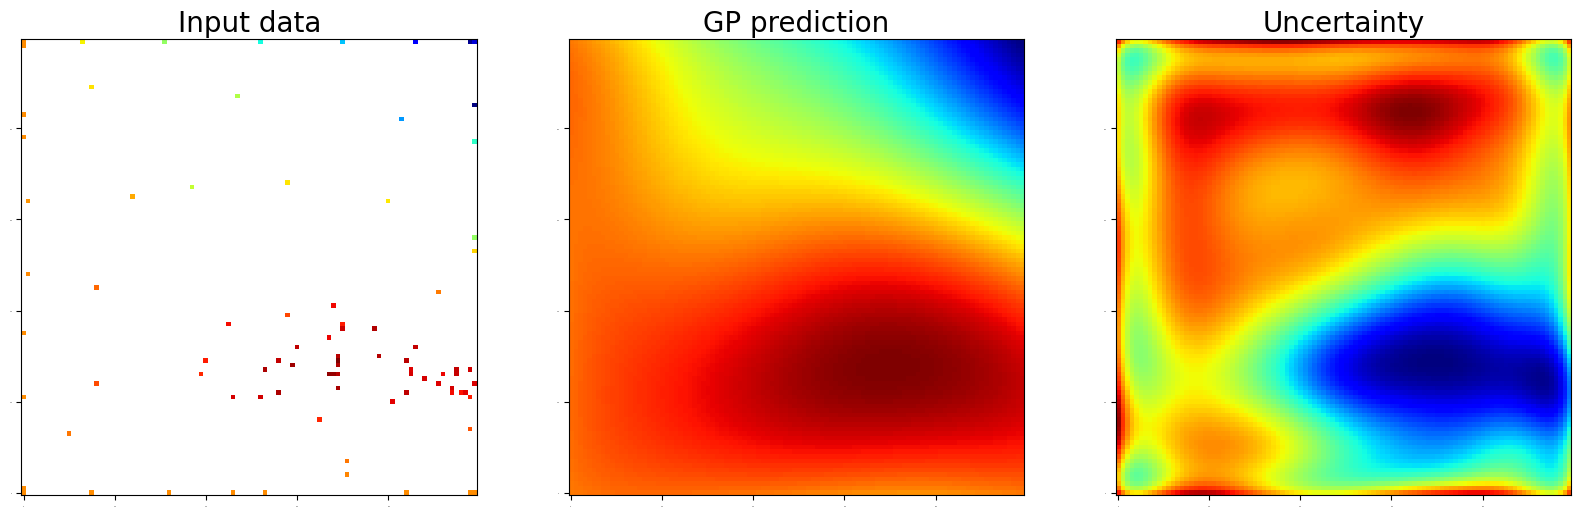

Step 86


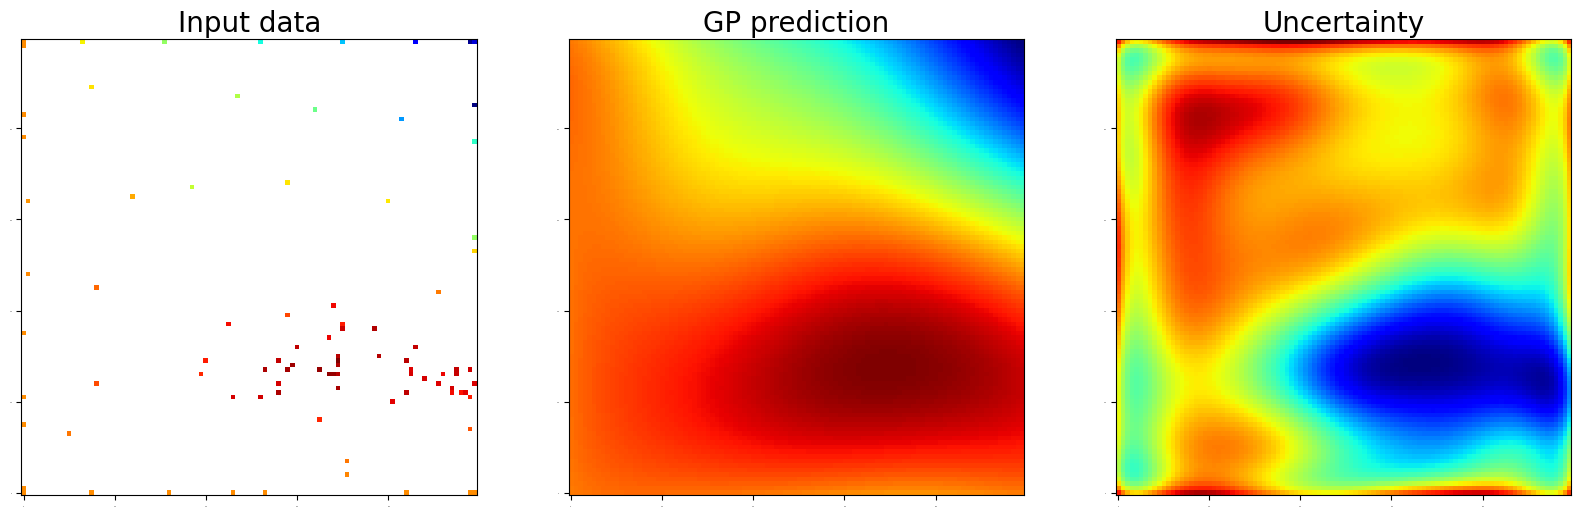

Step 91


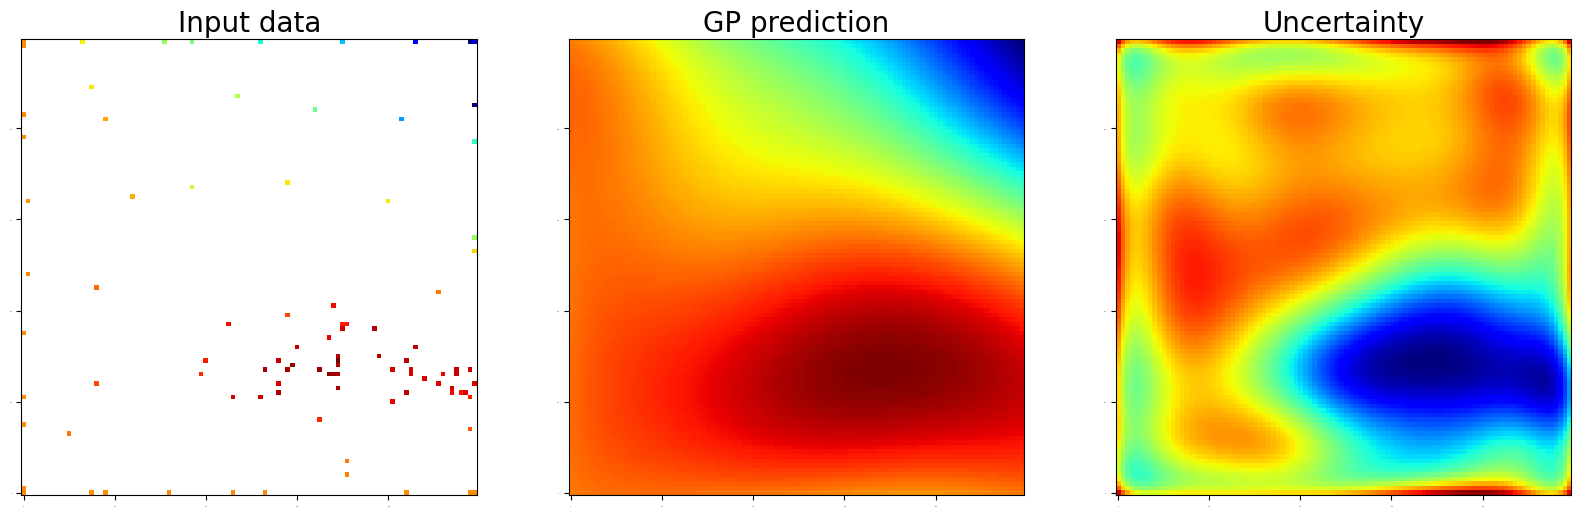

Step 96


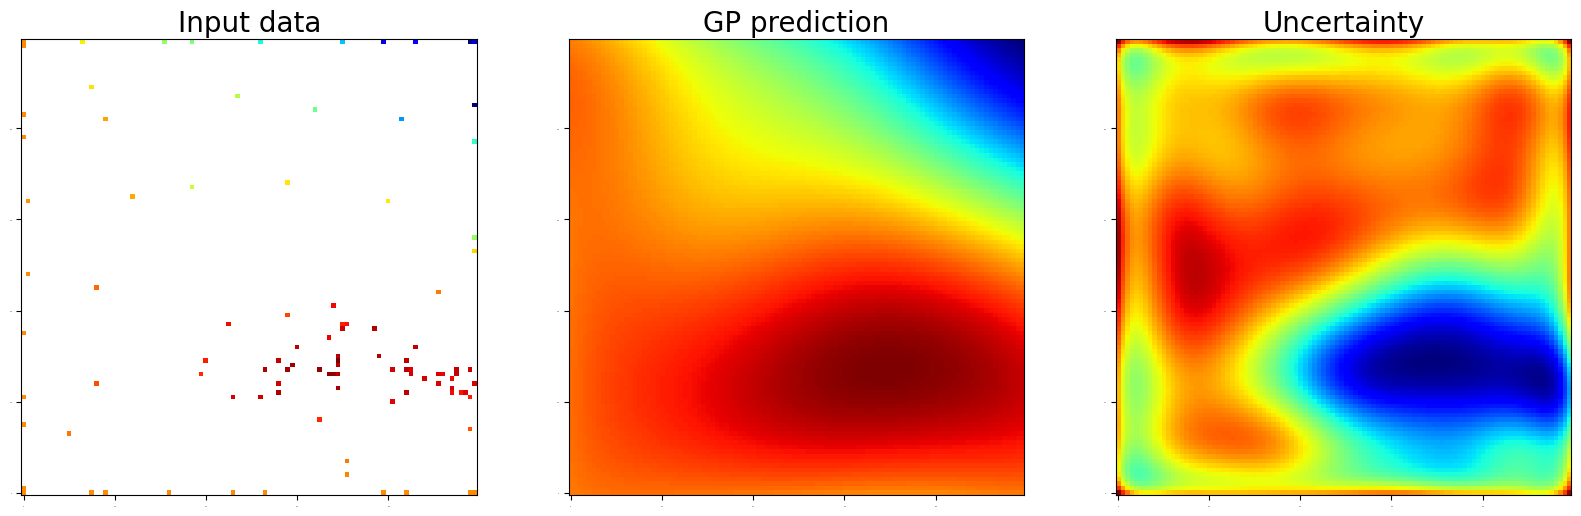

In [12]:
#def plot_exploration_results()
for i, (func, pred) in enumerate(zip(boptim.target_func_vals, boptim.gp_predictions)):
  if i % 5 == 0:
    print('Step {}'.format(i+1))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 12), dpi=100)
    ax1.imshow(func, cmap='jet', origin='lower')
    ax1.tick_params(labelsize = 0)
    ax2.imshow(pred[0], cmap='jet', origin='lower')
    ax2.tick_params(labelsize = 0)
    ax3.imshow(pred[1], cmap='jet', origin='lower')
    ax3.tick_params(labelsize = 0)
    ax1.set_title('Input data', size = 20)
    ax2.set_title('GP prediction', size = 20)
    ax3.set_title('Uncertainty', size = 20)
    plt.show()

Plot exploration history:

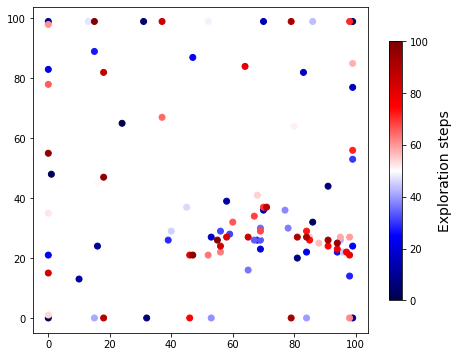

In [14]:
gpim.utils.plot_query_points(boptim.indices_all, cmap='seismic', plot_lines=False)